In [1]:
import re 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from pykalman import KalmanFilter
from numpy import ma 
from filterpy.kalman import KalmanFilter
from sklearn.model_selection import train_test_split
from pykalman import KalmanFilter
import random 
import math
import os

In [2]:
#df = pd.read_csv("C:/Users/kacpe/Desktop/study/research lab/data_full_v1.csv")
df = pd.read_csv("data_macaque_video2.csv")


In [3]:
body = ["nose","headTop","neck","tailBase","lEar","lShoulder","lElbow","lWrist","lHip","rEar","rShoulder","rElbow","rWrist","rHip"]
confidence = [0.80,0.80,0.75,0.65,0.85,0.75,0.58,0.60,0.65,0.8,0.7,0.7,0.55,0.65]
for i in range(len(body)):
    print(body[i],":",confidence[i])


nose : 0.8
headTop : 0.8
neck : 0.75
tailBase : 0.65
lEar : 0.85
lShoulder : 0.75
lElbow : 0.58
lWrist : 0.6
lHip : 0.65
rEar : 0.8
rShoulder : 0.7
rElbow : 0.7
rWrist : 0.55
rHip : 0.65


In [35]:
body_23 = df_m.columns[2::4]
body_23 = list(body_23)
print(body)

['nose', 'headTop', 'neck', 'tailBase', 'lEar', 'lShoulder', 'lElbow', 'lWrist', 'lHip', 'rEar', 'rShoulder', 'rElbow', 'rWrist', 'rHip']


In [5]:
for i in np.arange(len(body)):
    print(df[[body[i]+"_x",body[i]+"_y",body[i]+"_z"]].isna().sum())

nose_x    23
nose_y    23
nose_z    23
dtype: int64
headTop_x    23
headTop_y    23
headTop_z    23
dtype: int64
neck_x    23
neck_y    23
neck_z    23
dtype: int64
tailBase_x    23
tailBase_y    23
tailBase_z    23
dtype: int64
lEar_x    23
lEar_y    23
lEar_z    23
dtype: int64
lShoulder_x    23
lShoulder_y    23
lShoulder_z    23
dtype: int64
lElbow_x    23
lElbow_y    23
lElbow_z    23
dtype: int64
lWrist_x    23
lWrist_y    23
lWrist_z    23
dtype: int64
lHip_x    23
lHip_y    23
lHip_z    23
dtype: int64
rEar_x    23
rEar_y    23
rEar_z    23
dtype: int64
rShoulder_x    23
rShoulder_y    23
rShoulder_z    23
dtype: int64
rElbow_x    23
rElbow_y    23
rElbow_z    23
dtype: int64
rWrist_x    23
rWrist_y    23
rWrist_z    23
dtype: int64
rHip_x    23
rHip_y    23
rHip_z    23
dtype: int64


In [24]:
np.array(observations.loc[0])

array([1198.401611])

In [36]:
df = pd.read_csv("data_macaque_video2.csv")
for i in np.arange(len(body)):
    for k in range(1,df.shape[0]):
        if df.loc[k][body[i]+"_confidence"] <= confidence[i] or pd.isna(df.iloc[k][body[i]+"_confidence"]):
            df.at[k,body[i]+"_x"] = np.ma.masked
            df.at[k,body[i]+"_y"] = np.ma.masked
            df.at[k,body[i]+"_z"] = np.ma.masked

c:\Users\kacpe\anaconda3\lib\site-packages\pandas\core\frame.py:3273: UserWarning: Warning: converting a masked element to nan.
  series._values[loc] = value


In [37]:
# Define the transition matrix
t1 = 1.00
t01 = 0.005
transition_matrices = np.array([[t1, t01, 0.],
              [t01, t1,            t01],
              [0., t01,            t1]])

# Define the observation matrices
t2 = 1.00
t02 = 0.005
observation_matrices = ([[t2, t02, 0.],
              [t02, t2,            t02],
              [0., t02,            t2]])

# Define the transition covariance matrix 
t3 = 0.05
transition_covariance = [[t3, 0, 0],
                         [0, t3, 0],
                         [0, 0, t3]]

# Define the observation covariance matrix
t4 = 0.05
observation_covariance = [[t4, 0, 0],
                         [0, t4, 0],
                         [0, 0, t4]]


In [6]:
for z in np.arange(14):
    b = body[z]
    observations = df[[b+"_x",b+"_y",b+"_z"]]
    initial_state_mean = np.array(observations.loc[0])

# Define the range constraints for each column
    range_constraints = {
        b+'_x': (df[b+"_x"].min(),df[b+"_x"].max()),  # Range constraint for column 'x'
        b+'_y': (df[b+"_y"].min(),df[b+"_y"].max()),  # Range constraint for column 'y'
        b+'_z': (df[b+"_z"].min(),df[b+"_z"].max())    # Range constraint for column 'z'
    }

    # Create a Kalman filter instance
    kf = KalmanFilter(
        transition_matrices=transition_matrices,
        observation_matrices=observation_matrices,
        transition_covariance=transition_covariance,
        observation_covariance=observation_covariance,
    #transition_offsets=transition_offsets,
    #observation_offsets=observation_offsets,
        initial_state_mean=initial_state_mean
    )



    missing_mask = np.isnan(observations)
    obs_full = np.ma.masked_array(observations, missing_mask)
    filtered_state_means, _ = kf.filter(obs_full)

# Apply range constraint to each column separately
    for i, column in enumerate(observations.columns):
        range_min, range_max = range_constraints[column]

        # Apply range constraint to the estimated values for the current column
        filtered_state_means[:, i] = np.clip(filtered_state_means[:, i], range_min, range_max)

# Replace the masked (missing) values in the DataFrame with the filtered and constrained estimates
    df[[b+"_x", b+"_y", b+"_z"]] = pd.DataFrame(np.where(missing_mask, filtered_state_means, observations))


In [39]:
df.to_csv("data_filtered_macaque_v2.csv",index=False)

In [8]:
#df_f = df
df_m = pd.read_csv("data_macaque_video2.csv")

In [20]:
os.getcwd()

'c:\\Users\\kacpe\\Desktop'

In [9]:
index = (2,6,10,14,18,22,26,30,34,46,50,54,58,62)
#index = (42,38,66,70)
print(len(index))


14


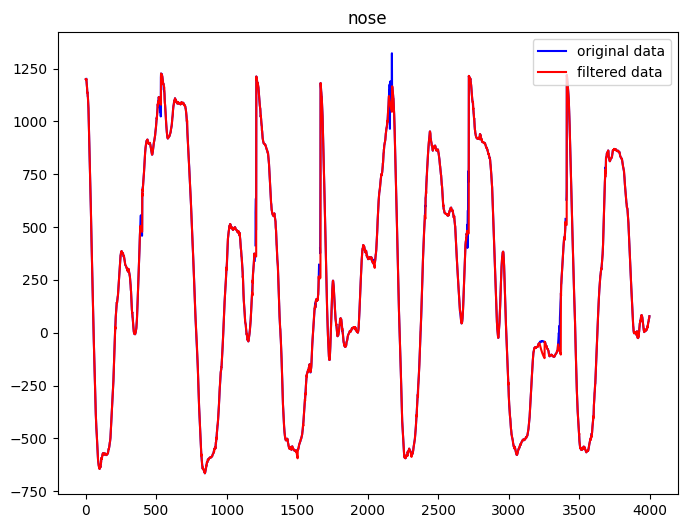

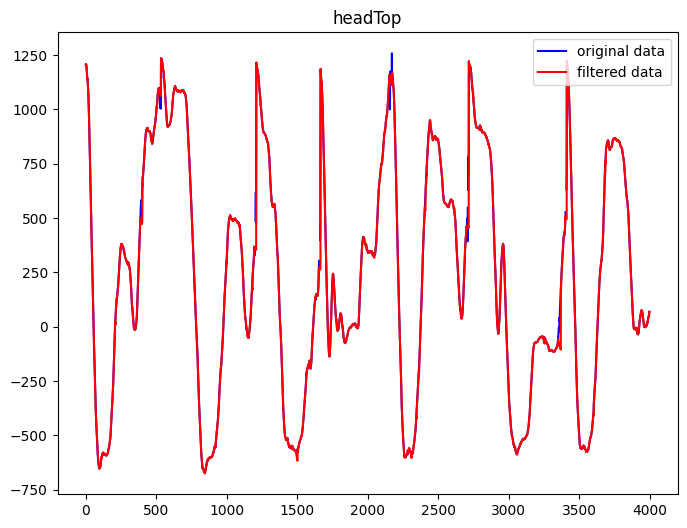

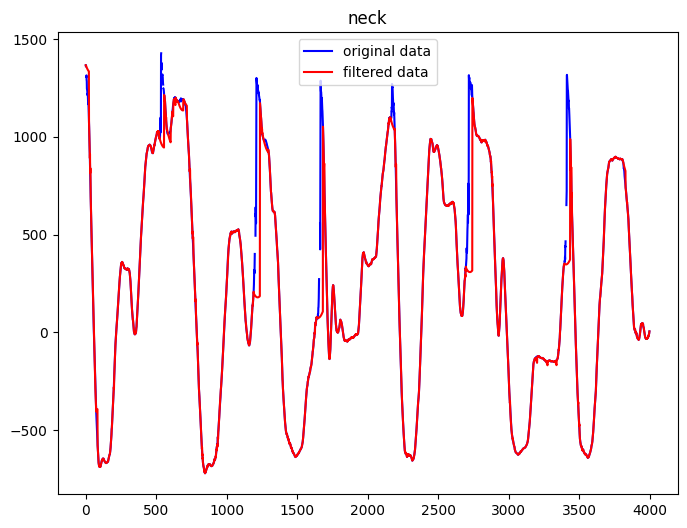

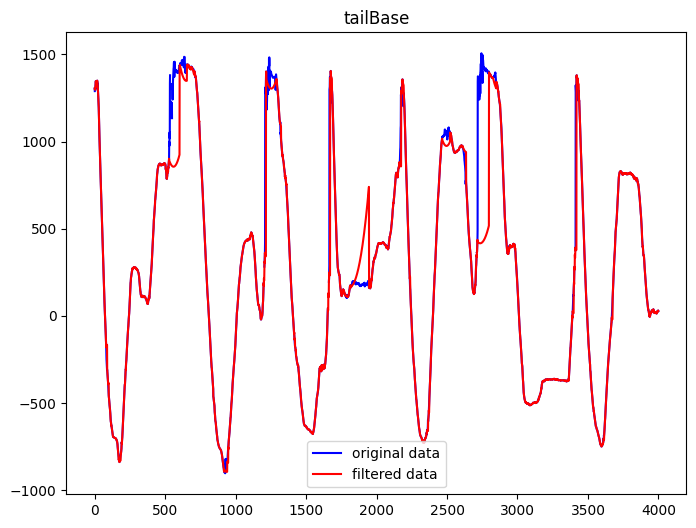

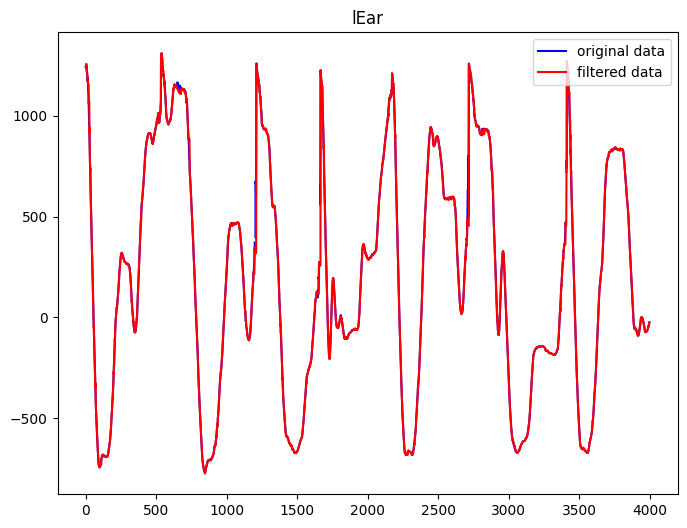

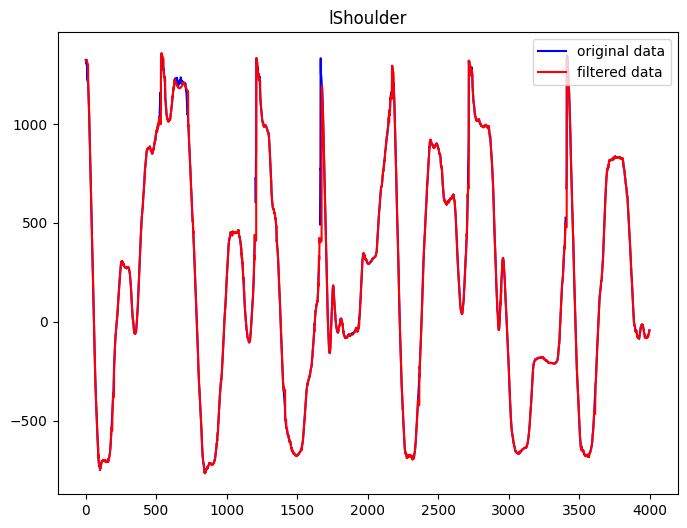

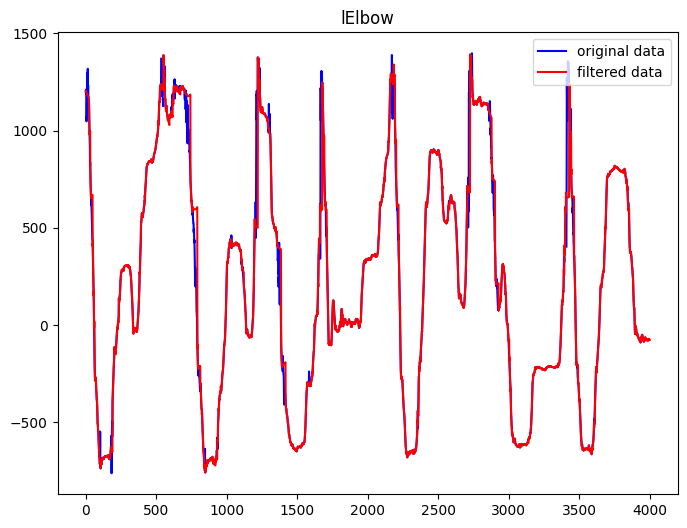

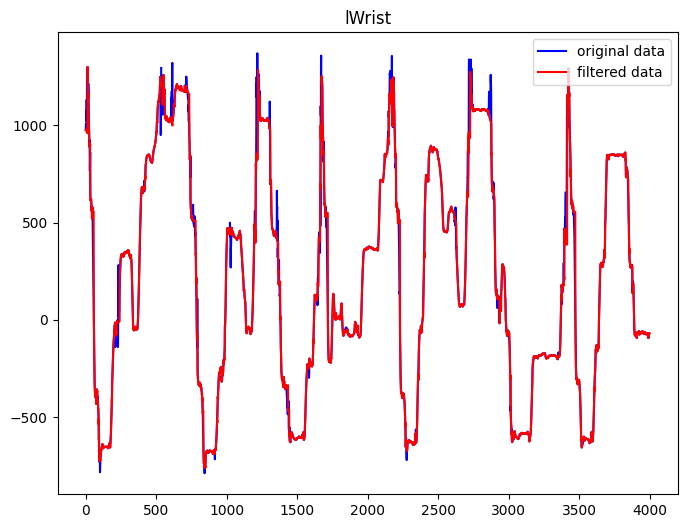

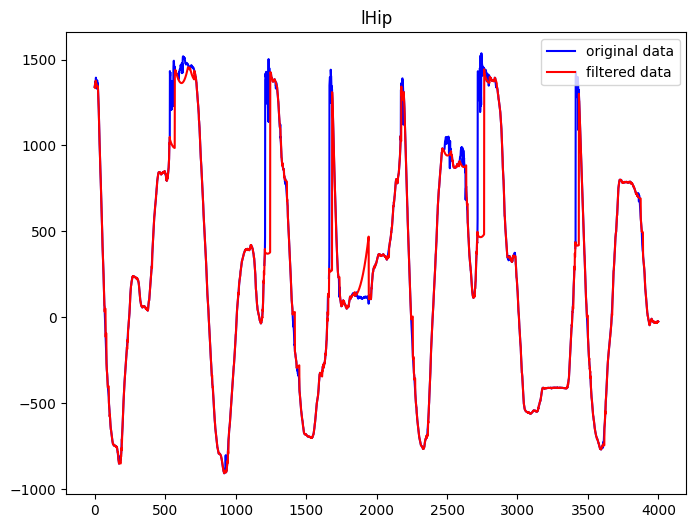

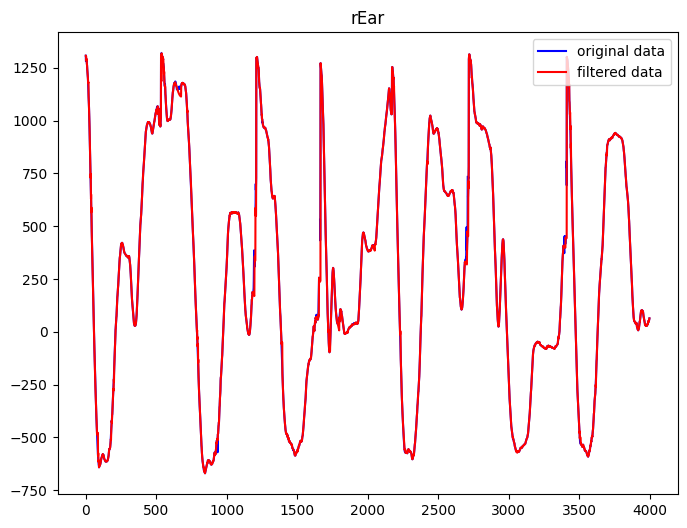

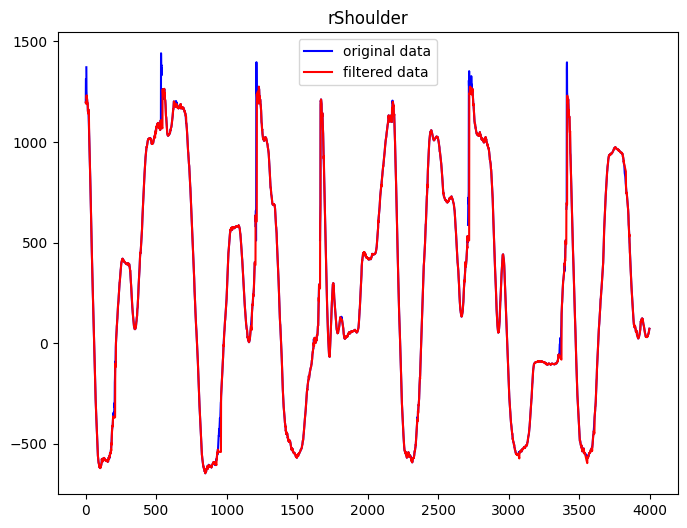

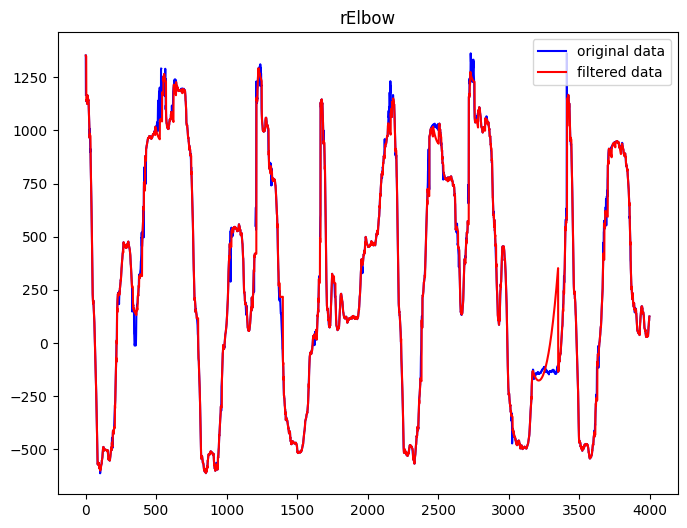

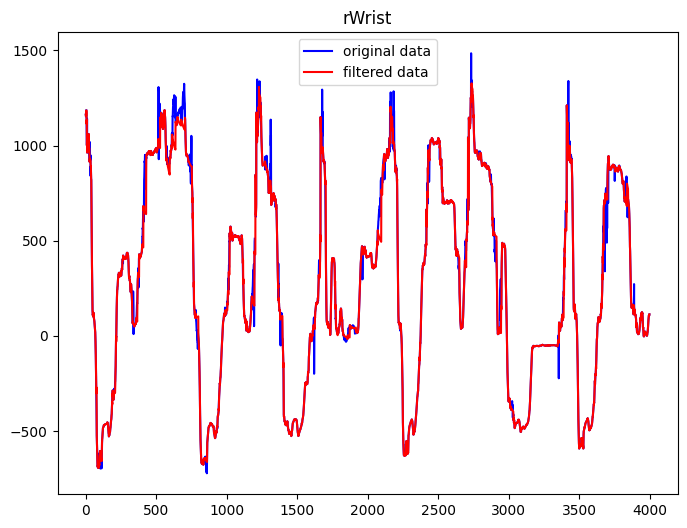

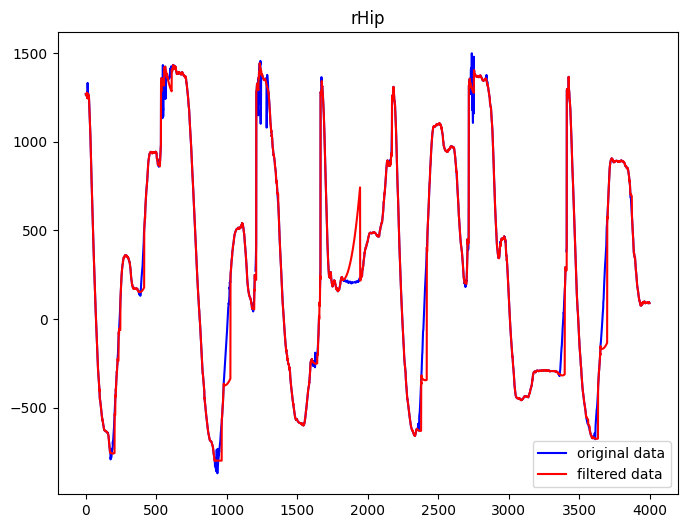

In [10]:
for z in np.arange(14):
    i = index[z]
    k = body[z]

#fig, ax = plt.subplots(figsize=(12, 6))

# Create the first scatter plot
    plt.figure(figsize=(8, 6))
    plt.plot(df_m.index[:4000], df_m.iloc[:4000,i], color='blue', label='original data')
    plt.plot(df.index[:4000], df.iloc[:4000,i], color='red', label='filtered data')
    plt.title(k)
#ax[0].set_ylim(-750,1500)
# Create the second scatter plot
#plt.plot(df_m.index[:2000], df_m.iloc[:2000,i], color='blue', label='original data')
#ax.set_title("orginal data"+" "+k)
    plt.legend()
#ax[1].set_ylim(-750,1500)
#fig.suptitle("x vs frame index", fontsize=14, fontweight='bold')
            # Display the plot
    #plt.savefig(k+'_test.png')
    plt.show()
        

In [38]:
df = pd.read_csv('data_macaque_only_filtered.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data_macaque_only_filtered.csv'

In [17]:

t1 = 1.00
t01 = 0.005
transition_matrices = [[t1, t01, 0],
              [t01, t1,            t01],
              [0, t01,            t1]]

t2 = 1.00
t02 = 0.005
observation_matrices = ([[t2, t02, 0],
              [t02, t2,            t02],
              [0, t02,            t2]])

t3 = 0.05
transition_covariance = [[t3, 0, 0],
                         [0, t3, 0],
                         [0, 0, t3]]

t4 = 0.05
observation_covariance = [[t4, 0, 0],
                         [0, t4, 0],
                         [0, 0, t4]]

kf = KalmanFilter(
transition_matrices=transition_matrices,
observation_matrices=observation_matrices,
transition_covariance=transition_covariance,
observation_covariance=observation_covariance,
initial_state_mean=initial_state_mean )


In [6]:
df.columns

Index(['id', 'neck_x', 'neck_y', 'neck_z', 'lowerBack_x', 'lowerBack_y',
       'lowerBack_z', 'leftShoulder_x', 'leftShoulder_y', 'leftShoulder_z'],
      dtype='object')

In [7]:
body = ['neck','lowerBack','leftShoulder']

In [11]:
for i in np.arange(len(body)):
    for k in range(1,df.shape[0]):
        if pd.isna(df.iloc[k][body[i]+"_x"]):
            df.at[k,body[i]+"_x"] = np.ma.masked
            df.at[k,body[i]+"_y"] = np.ma.masked
            df.at[k,body[i]+"_z"] = np.ma.masked

c:\Users\kacpe\anaconda3\lib\site-packages\pandas\core\frame.py:3273: UserWarning: Warning: converting a masked element to nan.
  series._values[loc] = value


In [18]:
for b in body:
    observations = df[[b+"_x", b+"_y", b+"_z"]]
    initial_state_mean = np.array(observations.loc[0])

# Define the range constraints for each column
    range_constraints = {
        b+'_x': (df[b+"_x"].min(),df[b+"_x"].max()),  # Range constraint for column 'x'
        b+'_y': (df[b+"_y"].min(),df[b+"_y"].max()),  # Range constraint for column 'y'
        b+'_z': (df[b+"_z"].min(),df[b+"_z"].max())    # Range constraint for column 'z'
    }

    # Create a Kalman filter instance
    kf = KalmanFilter(
        transition_matrices=transition_matrices,
        observation_matrices=observation_matrices,
        transition_covariance=transition_covariance,
        observation_covariance=observation_covariance,
        initial_state_mean=initial_state_mean
    )



    missing_mask = np.isnan(observations)
    obs_full = np.ma.masked_array(observations, missing_mask)
    filtered_state_means, _ = kf.filter(obs_full)

# Apply range constraint to each column separately
    for i, column in enumerate(observations.columns):
        range_min, range_max = range_constraints[column]

        # Apply range constraint to the estimated values for the current column
        filtered_state_means[:, i] = np.clip(filtered_state_means[:, i], range_min, range_max)

# Replace the masked (missing) values in the DataFrame with the filtered and constrained estimates
    df[[b+"_x", b+"_y", b+"_z"]] = pd.DataFrame(np.where(missing_mask, filtered_state_means, observations))




# Apply range constraint to the estimated values
#filtered_state_means = np.clip(filtered_state_means, range_min, range_max)

#smoothed_state_means, _ = kf.smooth(obs_full)
#df[[b+"_x",b+"_y",b+"_z"]] = pd.DataFrame(np.where(missing_mask, filtered_state_means, observations))
#df[[b+"_x",b+"_y",b+"_z"]].isna().sum()

In [20]:
df.to_csv("data_human_filtered.csv",index=False)

In [21]:
df.isna().sum()

id                0
neck_x            0
neck_y            0
neck_z            0
lowerBack_x       0
lowerBack_y       0
lowerBack_z       0
leftShoulder_x    0
leftShoulder_y    0
leftShoulder_z    0
dtype: int64